In [47]:
import numpy as np
import pandas as pd
import glob
import os
import icecream as ic

In [29]:
root_path = "/home/mbpl/morizane/analysis_sensitivity/results"
file_name = "pos_10.0_rot_10.0"
glob.glob(os.path.join(root_path, file_name, "*.xlsx"))

df = pd.read_excel(os.path.join(root_path, file_name, f"input_A_{file_name}.xlsx"))
df.head(5)

,dvh_tumour_d90,dvh_normal_d90,dvh_tumour_d50,dvh_normal_d50,dvh_tumour_d10,dvh_normal_d10,cover_rate_normal_100,cover_rate_tumour_100,irrad_volume_normal_100,irrad_volume_tumour_100,...,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,mua_normal,mus_normal,mua_tumour,mus_tumour
0,0.003226,2.686002e-07,0.729879,0.000025,24.116769,0.001490,0.000013,5.897526,28,503,...,249.830487,416.092227,378.506655,-76.122286,59.309111,6.150351,0.333378,27.093587,0.269084,18.521115
1,0.003733,2.652041e-07,0.292577,0.000024,16.546251,0.001419,0.000025,5.160913,54,441,...,247.789226,420.325529,376.225167,30.827641,-24.937960,88.191580,0.374623,25.805955,0.270840,19.381566
2,0.007718,2.069158e-07,0.552769,0.000016,16.801239,0.019797,0.000050,4.069971,108,349,...,244.720456,414.168370,386.444191,-77.932398,53.344891,20.757262,0.403549,25.894391,0.270418,19.277966
3,0.007028,2.019269e-07,0.340665,0.000014,16.539720,0.017212,0.000049,4.457410,106,382,...,248.951548,419.462154,385.511009,-3.250878,1.847909,96.623067,0.349446,25.097717,0.275325,19.982923
4,0.008913,2.674524e-07,0.257370,0.000025,13.686092,0.001432,0.000061,3.679553,131,316,...,252.769933,415.917281,384.290780,58.448079,-35.138551,-68.550013,0.392263,28.760261,0.268804,19.720699


In [64]:
def box_Outlier(input_df):
  #入力のコピーを作成
  output_df=input_df.copy()
  #詳細を表示するデータの列を指定
  #指定した列分繰り返す
  #第1四分位数を取得
  q1 = np.percentile(output_df, 25)
  #第2四分位数を取得
  q3 = np.percentile(output_df, 75)    #IQRを取得
  iqr=q3-q1
  #外れ値基準の下限を取得
  bottom=q1-(1.5*iqr)
  #外れ値基準の上限を取得
  up=q3+(1.5*iqr)
  #列名、Q1、Q3、IQR、外れ値を表示
  print("Q1は："+str(q1))
  print("Q3は："+str(q3))
  print("IQRは："+str(iqr))
  print("外れ値は↓")
  print(output_df[(output_df < bottom) | (output_df > up) ])
  return max(output_df[(output_df < bottom) | (output_df > up) ]) if len(output_df[(output_df < bottom) | (output_df > up) ]) > 0 else 0

Q1は：46.61843142038167
Q3は：54.26618160619285
IQRは：7.647750185811184
外れ値は↓
Series([], Name: cover_rate_tumour_1, dtype: float64)
Q1は：43.08728974235631
Q3は：52.76344864625056
IQRは：9.676158903894247
外れ値は↓
241    21.895006
251    28.119549
410    18.358382
444    24.500232
652    27.964725
754    27.735102
824    28.137369
861    27.919136
Name: cover_rate_tumour_1, dtype: float64
Q1は：36.26333449814985
Q3は：50.43733577599828
IQRは：14.174001277848426
外れ値は↓
130    10.385723
258    12.721621
286    11.247985
297     9.707844
383     3.013573
539     6.441224
594    14.315449
626    14.715372
630     8.166552
663     6.383713
670    13.020474
743    14.346920
Name: cover_rate_tumour_1, dtype: float64


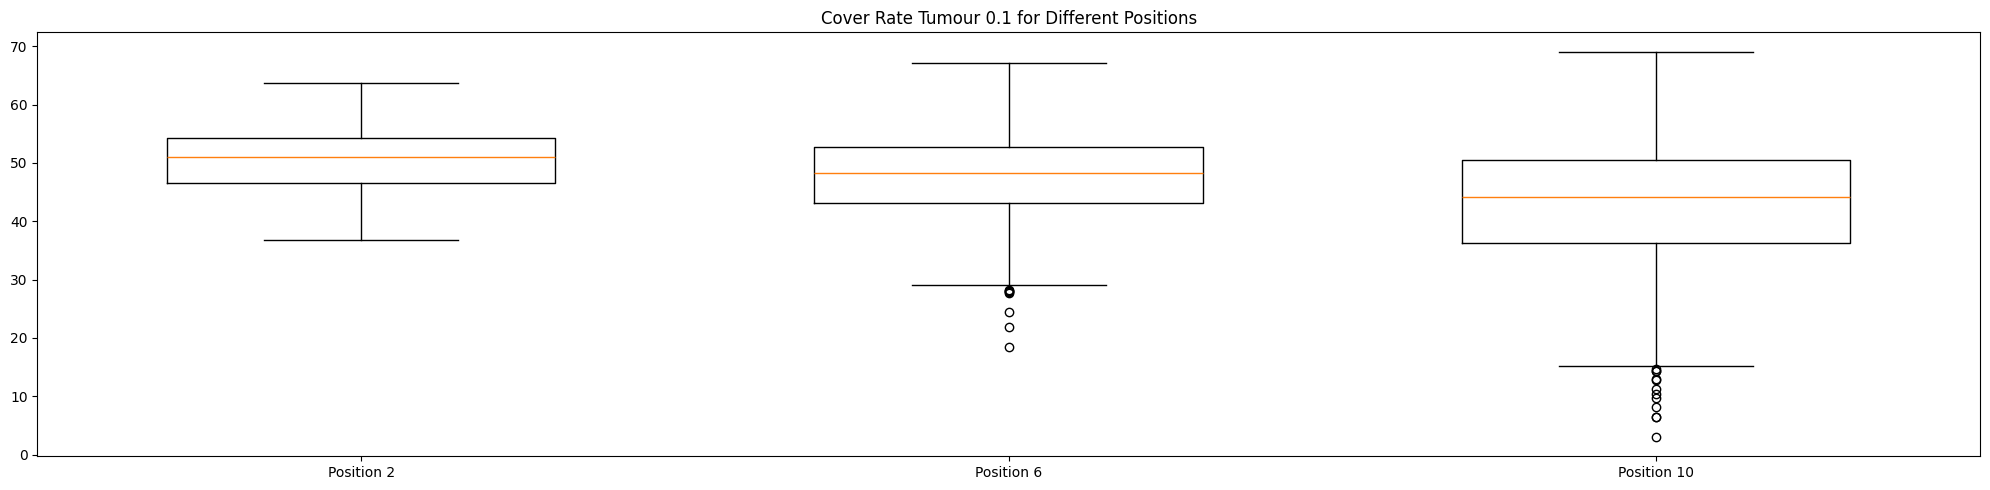

ic| min_val: [36.77140520967176, 29.07908489141796, 15.14068265682657]
ic| max_val: [np.float64(63.72169423911767),
              np.float64(67.17503519474425),
              np.float64(69.0691395703721)]


[np.float64(63.72169423911767),
 np.float64(67.17503519474425),
 np.float64(69.0691395703721)]

In [66]:
import matplotlib.pyplot as plt

positions = [2, 6, 10]
cover_rate_tumour_0_1 = []

for pos in positions:
    file_name = f"pos_{pos}.0_rot_10.0"
    df = pd.read_excel(os.path.join(root_path, file_name, f"input_A_{file_name}.xlsx"))
    cover_rate_tumour_0_1.append(df['cover_rate_tumour_1'])
    

fig, ax = plt.subplots(figsize=(20, 5))
min_val = []

for pos, data in zip(positions, cover_rate_tumour_0_1):
    ax.boxplot(data, positions=[positions.index(pos) + 1], widths=0.6)
    except_max_val = box_Outlier(data)
    min_val.append(min(data[data > except_max_val]))


max_val = [d.max() for d in cover_rate_tumour_0_1]

ax.set_xticks(range(1, len(positions) + 1))
ax.set_xticklabels([f'Position {pos}' for pos in positions])
ax.set_title('Cover Rate Tumour 0.1 for Different Positions')
plt.tight_layout()
plt.show()

ic.ic(min_val)
ic.ic(max_val)


['0.1', '1', '5', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']


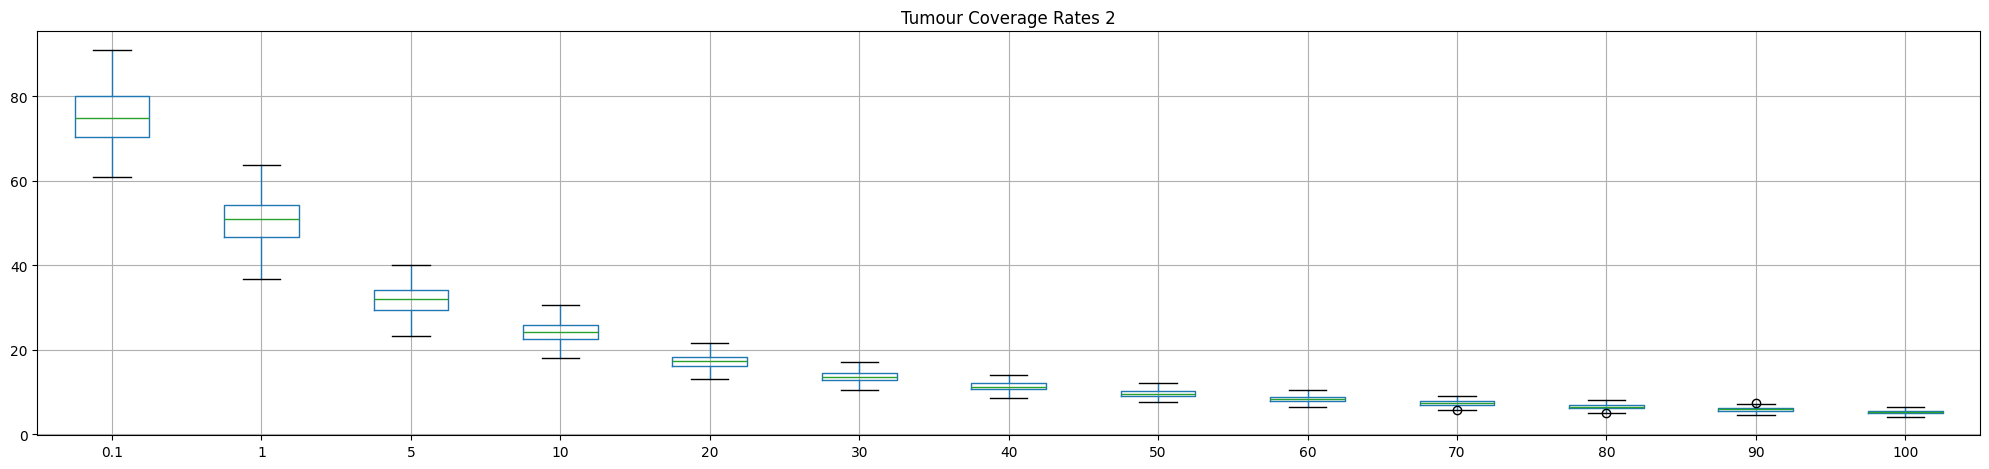

['0.1', '1', '5', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']


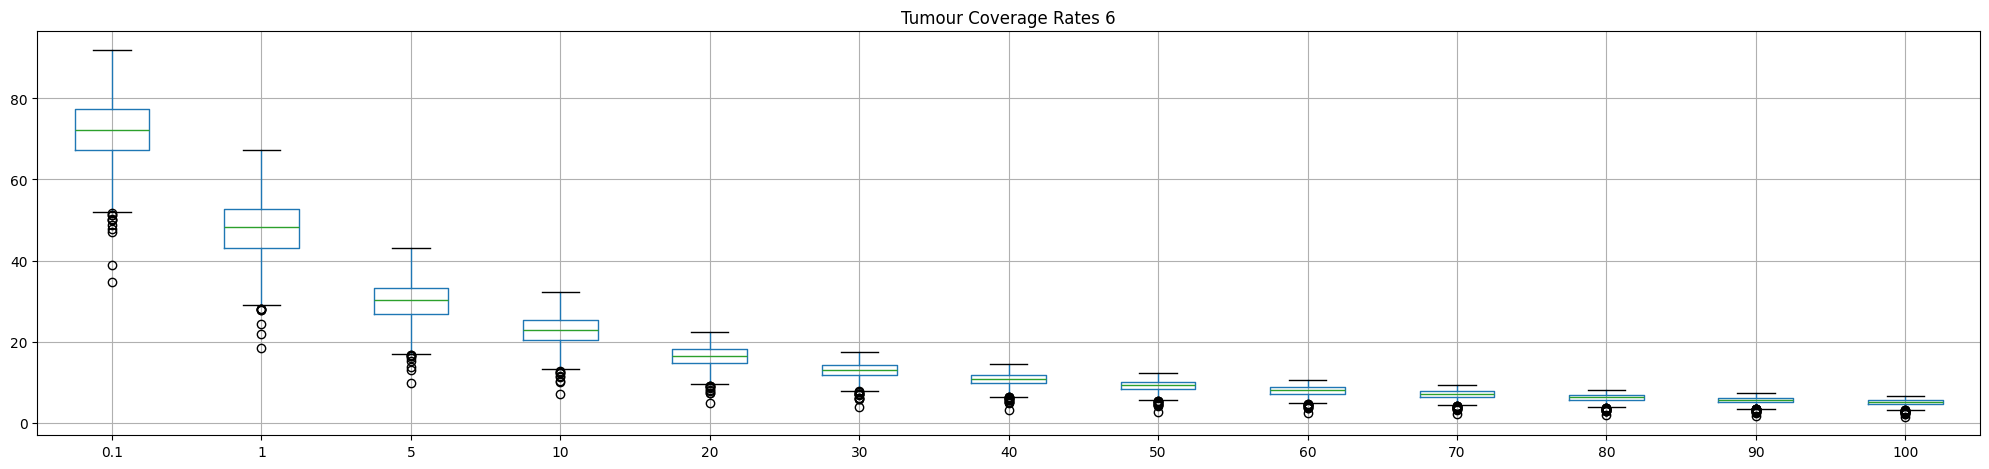

['0.1', '1', '5', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']


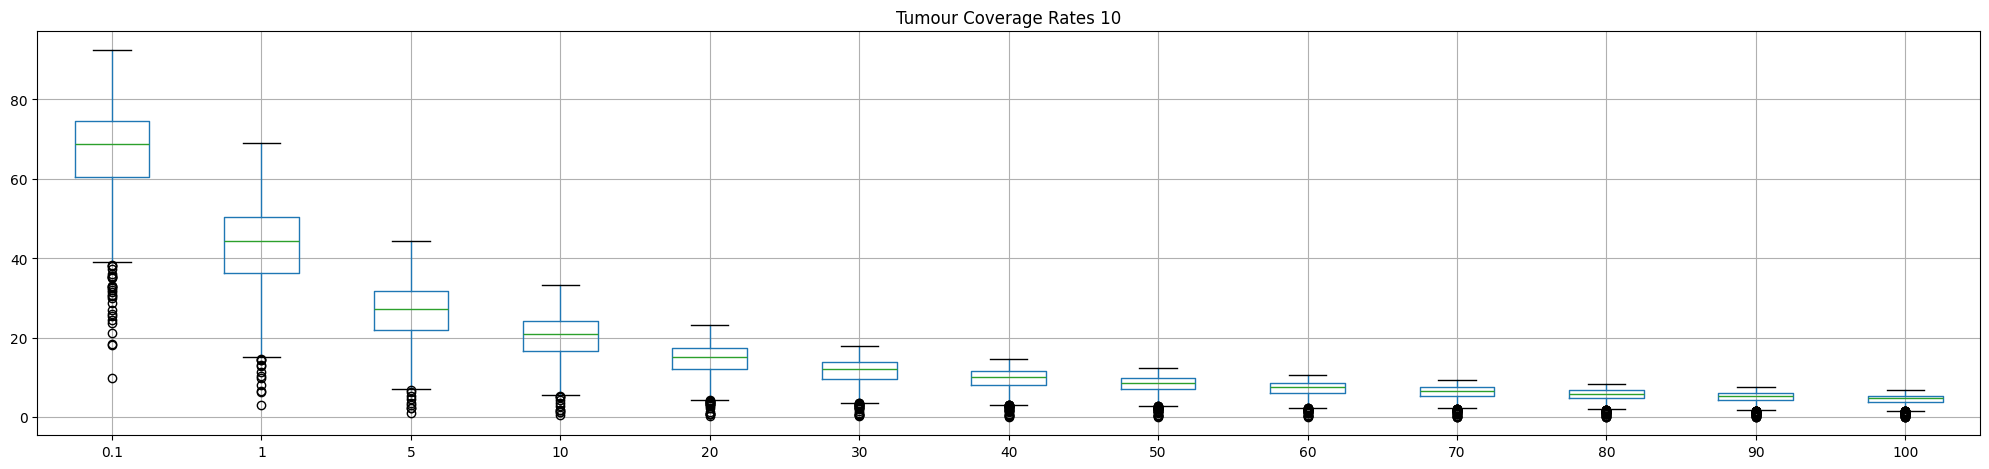

In [32]:
import matplotlib.pyplot as plt


for pos in [2, 6, 10]:
    file_name = f"pos_{pos}.0_rot_10.0"
    glob.glob(os.path.join(root_path, file_name, "*.xlsx"))

    df = pd.read_excel(os.path.join(root_path, file_name, f"input_A_{file_name}.xlsx"))
    dvh_tumour_columns = [col for col in df.columns if col.startswith('cover_rate_tumour')][::-1]
    labels = [col.split('_')[-1] for col in dvh_tumour_columns]
    print(labels)

    fig, ax = plt.subplots(figsize=(20, 5))
    df.boxplot(column=dvh_tumour_columns, ax=ax)
    ax.set_xticklabels(labels)
    ax.set_title(f'Tumour Coverage Rates {pos}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()


In [ ]:
for pos in [2, 6, 10]:
    file_name = f"pos_{pos}.0_rot_10.0"
    glob.glob(os.path.join(root_path, file_name, "*.xlsx"))

    df = pd.read_excel(os.path.join(root_path, file_name, f"input_A_{file_name}.xlsx"))
    dvh_tumour_columns = [col for col in df.columns if col.startswith('dvh_tumour_d')][::-1]
    labels = [col.split('_')[-1] for col in dvh_tumour_columns]

fig, ax = plt.subplots(figsize=(20, 5))
df.boxplot(column=dvh_tumour_columns, ax=ax)
ax.set_xticklabels(labels)
ax.set_title(f'Tumour Coverage Rates {pos}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

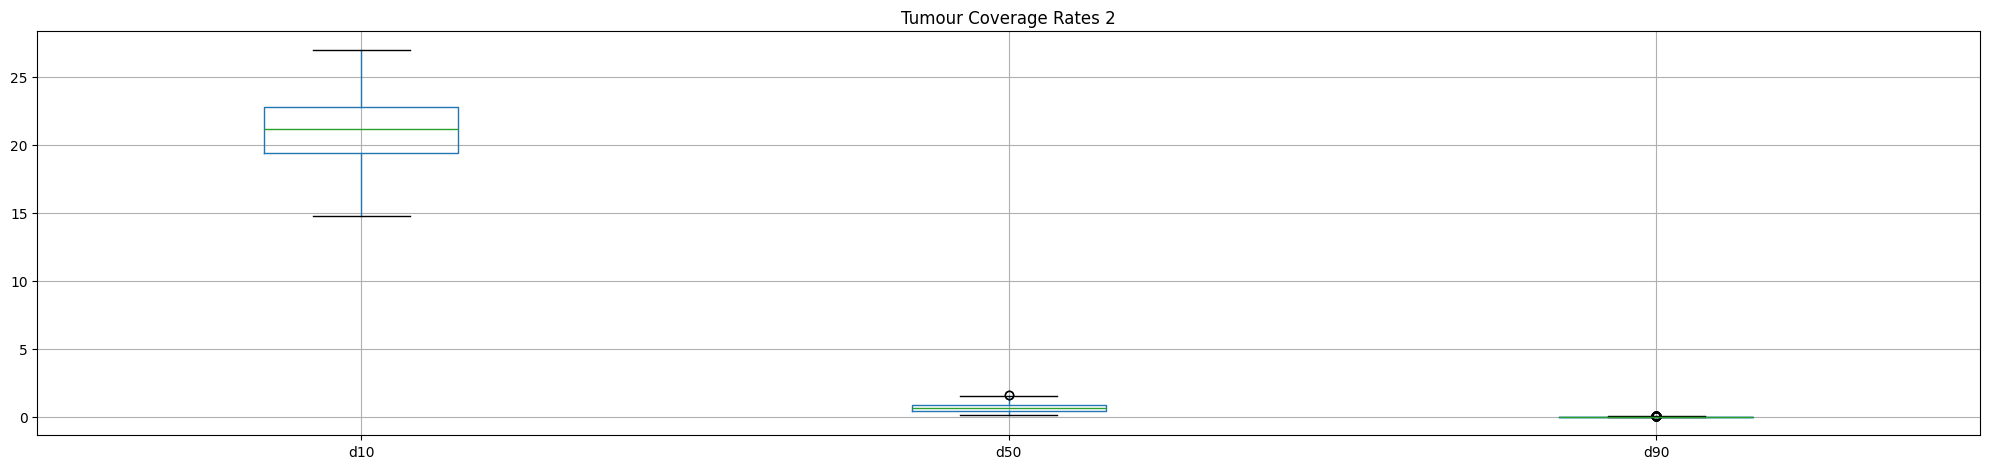

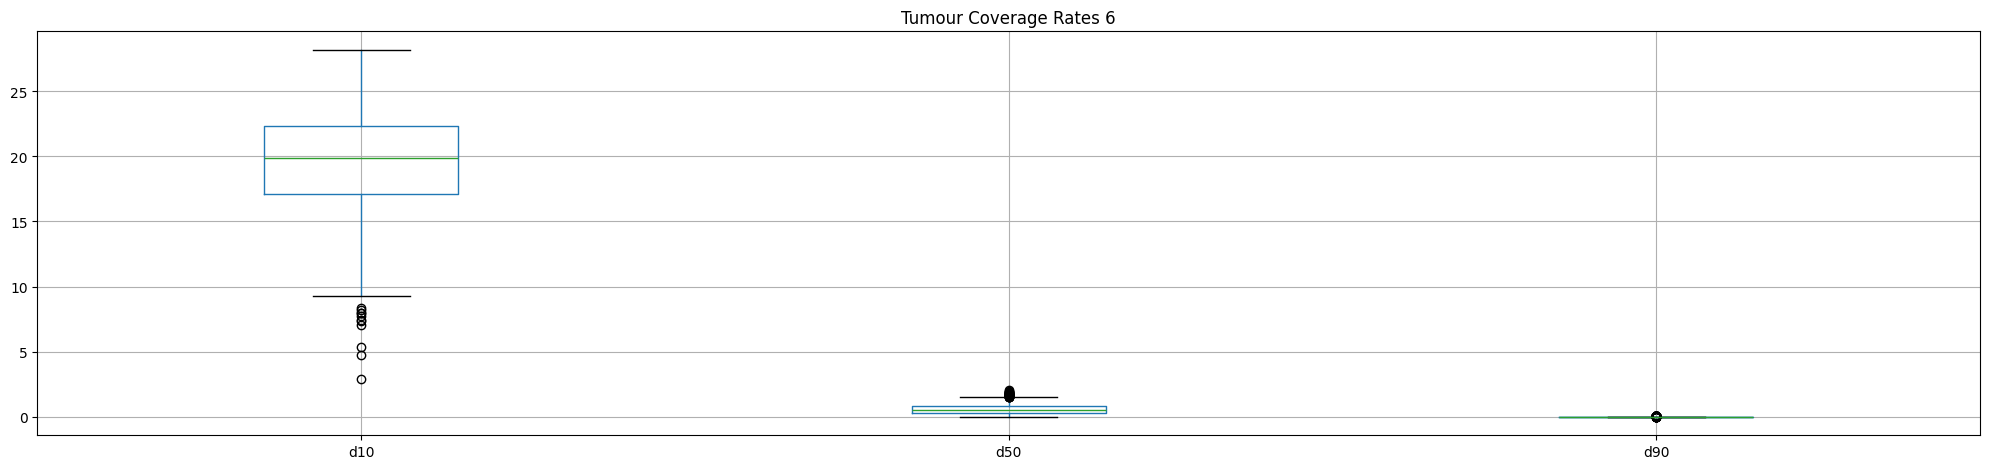

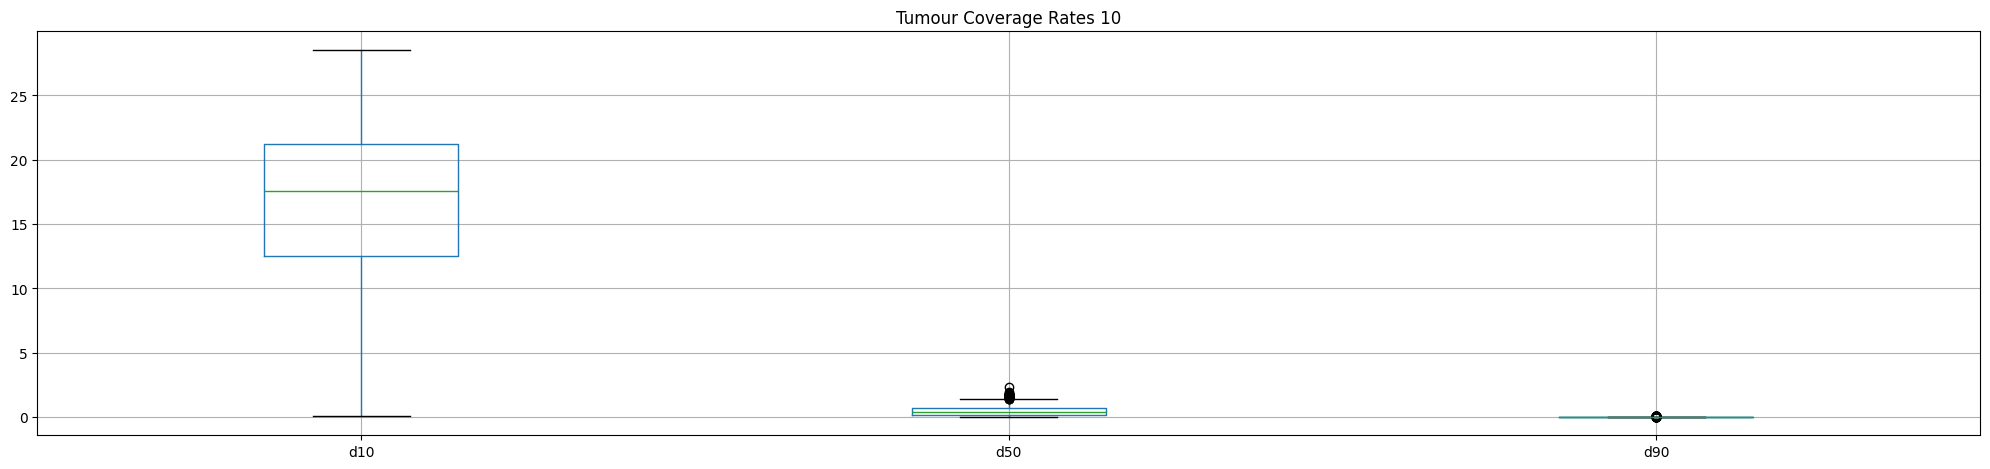

In [35]:
import matplotlib.pyplot as plt

for pos in [2, 6, 10]:
    file_name = f"pos_{pos}.0_rot_10.0"
    glob.glob(os.path.join(root_path, file_name, "*.xlsx"))

    df = pd.read_excel(os.path.join(root_path, file_name, f"input_A_{file_name}.xlsx"))
    dvh_tumour_columns = [col for col in df.columns if col.startswith('dvh_tumour_d')][::-1]
    labels = [col.split('_')[-1] for col in dvh_tumour_columns]

    fig, ax = plt.subplots(figsize=(20, 5))
    df.boxplot(column=dvh_tumour_columns, ax=ax)
    ax.set_xticklabels(labels)
    ax.set_title(f'Tumour Coverage Rates {pos}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()